**bold text**## TASK 3 : In this task I have clustered the countries by using unsupervised learning. Here I have used two techniques here first one is K-means clustering and the second one is Hierarchical clustering.

The main objective is to categorise the countries using socio-economic and health factors that determine the overall development of the country.

## STEP 0 : IMPORTING THE LIBRARIES

In [37]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Reading thr dataset
data = pd.read_csv('/content/Dataset/Country-data.csv')

##Step 1:  Descriptive Statistics

In [39]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [40]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [41]:
data_dict = pd.read_csv('/content/Dataset/data-dictionary.csv')
data_dict
# In this csv file they have given the name and their description just for the sake of our understanding

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [42]:
data.shape

(167, 10)

In [43]:
# some basic statistical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [45]:
# Checking for null values
data.isnull().values.any()

False

In [46]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [47]:
#counting the number of countries present in the dataset
data['country'].nunique()

167

## OBSERVATIONS
1. There are total 167 countries and 9 features in the dataset

2. Each feature of float datatype and the 'gdpp' is of int datatype and the 'country' is a string.

3. None of the feature is having zero values.

4. Since we are going to use Unsupervised learning technique we don't need the country colummn here. So we are going to drop it.

In [48]:
n_data = data.drop(['country'], axis = 1)

In [49]:
n_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Step 2: Data Visualization

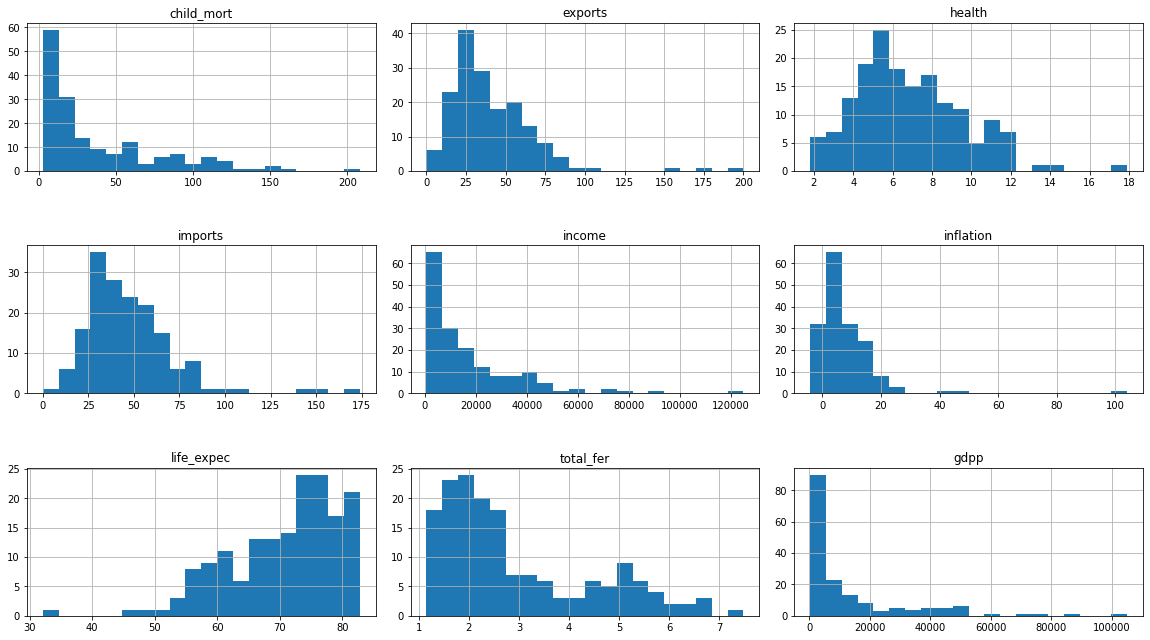

In [50]:
#Hisogram of each feature
import  itertools

col = n_data.columns[:10]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
  plt.subplot((length/2), 3, j + 1)
  plt.subplots_adjust(wspace = 0.1, hspace = 0.5)
  n_data[i].hist(bins = 20)
  plt.title(i)
plt.show()

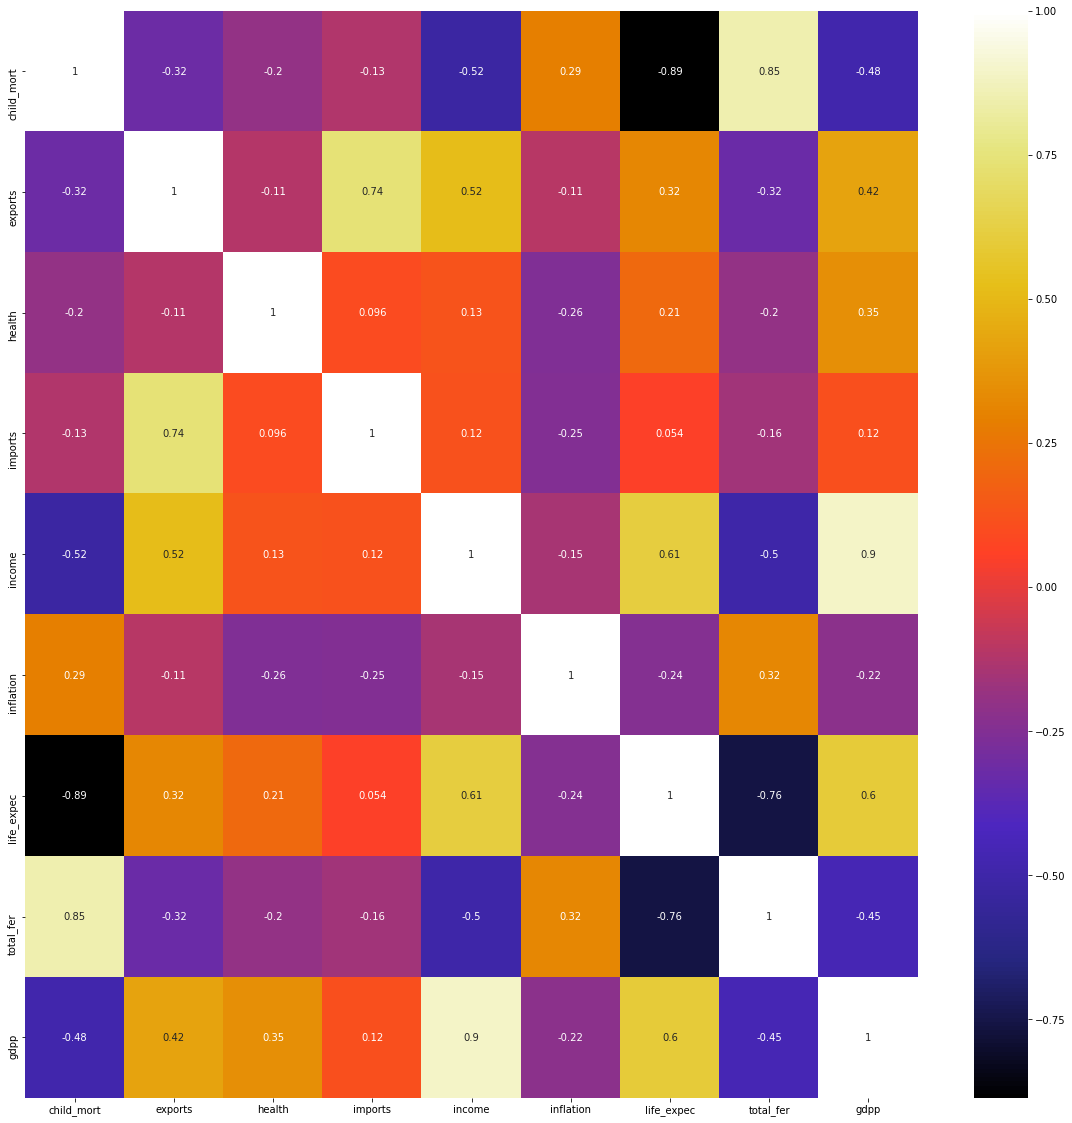

In [51]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = n_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(n_data[top_corr_features].corr(),annot=True,cmap="CMRmap")

## Observations

1. gdpp , income , imports , exports, child_mort and total_fert are highly positive correlated

2. Whereas life_expec and child_mort are highly negative correlated

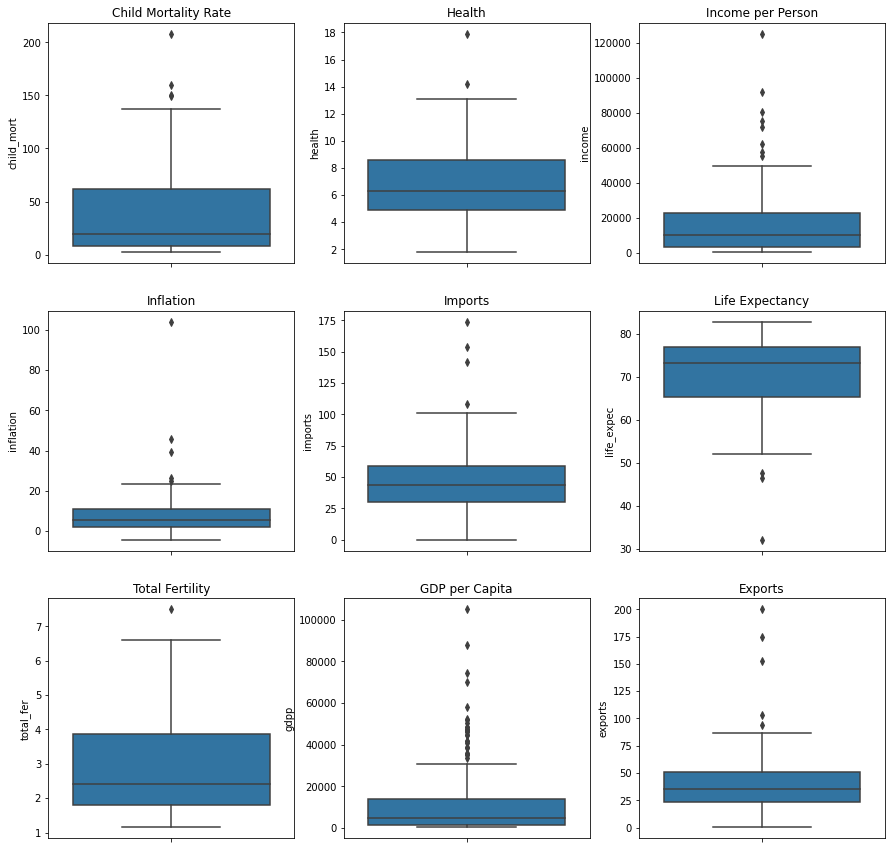

In [52]:
# box plot of each feature
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=n_data.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=n_data.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
bp=sns.boxplot(y=n_data.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=n_data.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=n_data.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=n_data.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=n_data.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=n_data.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=n_data.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

 From above box-plots we can see that their are a lot of  outliers in our dataset. Most of the outliers are in income per person , gdpp and exports. 
Normally we need to remove the outliers but since the dataset is very small, we are not going to remove the outliers



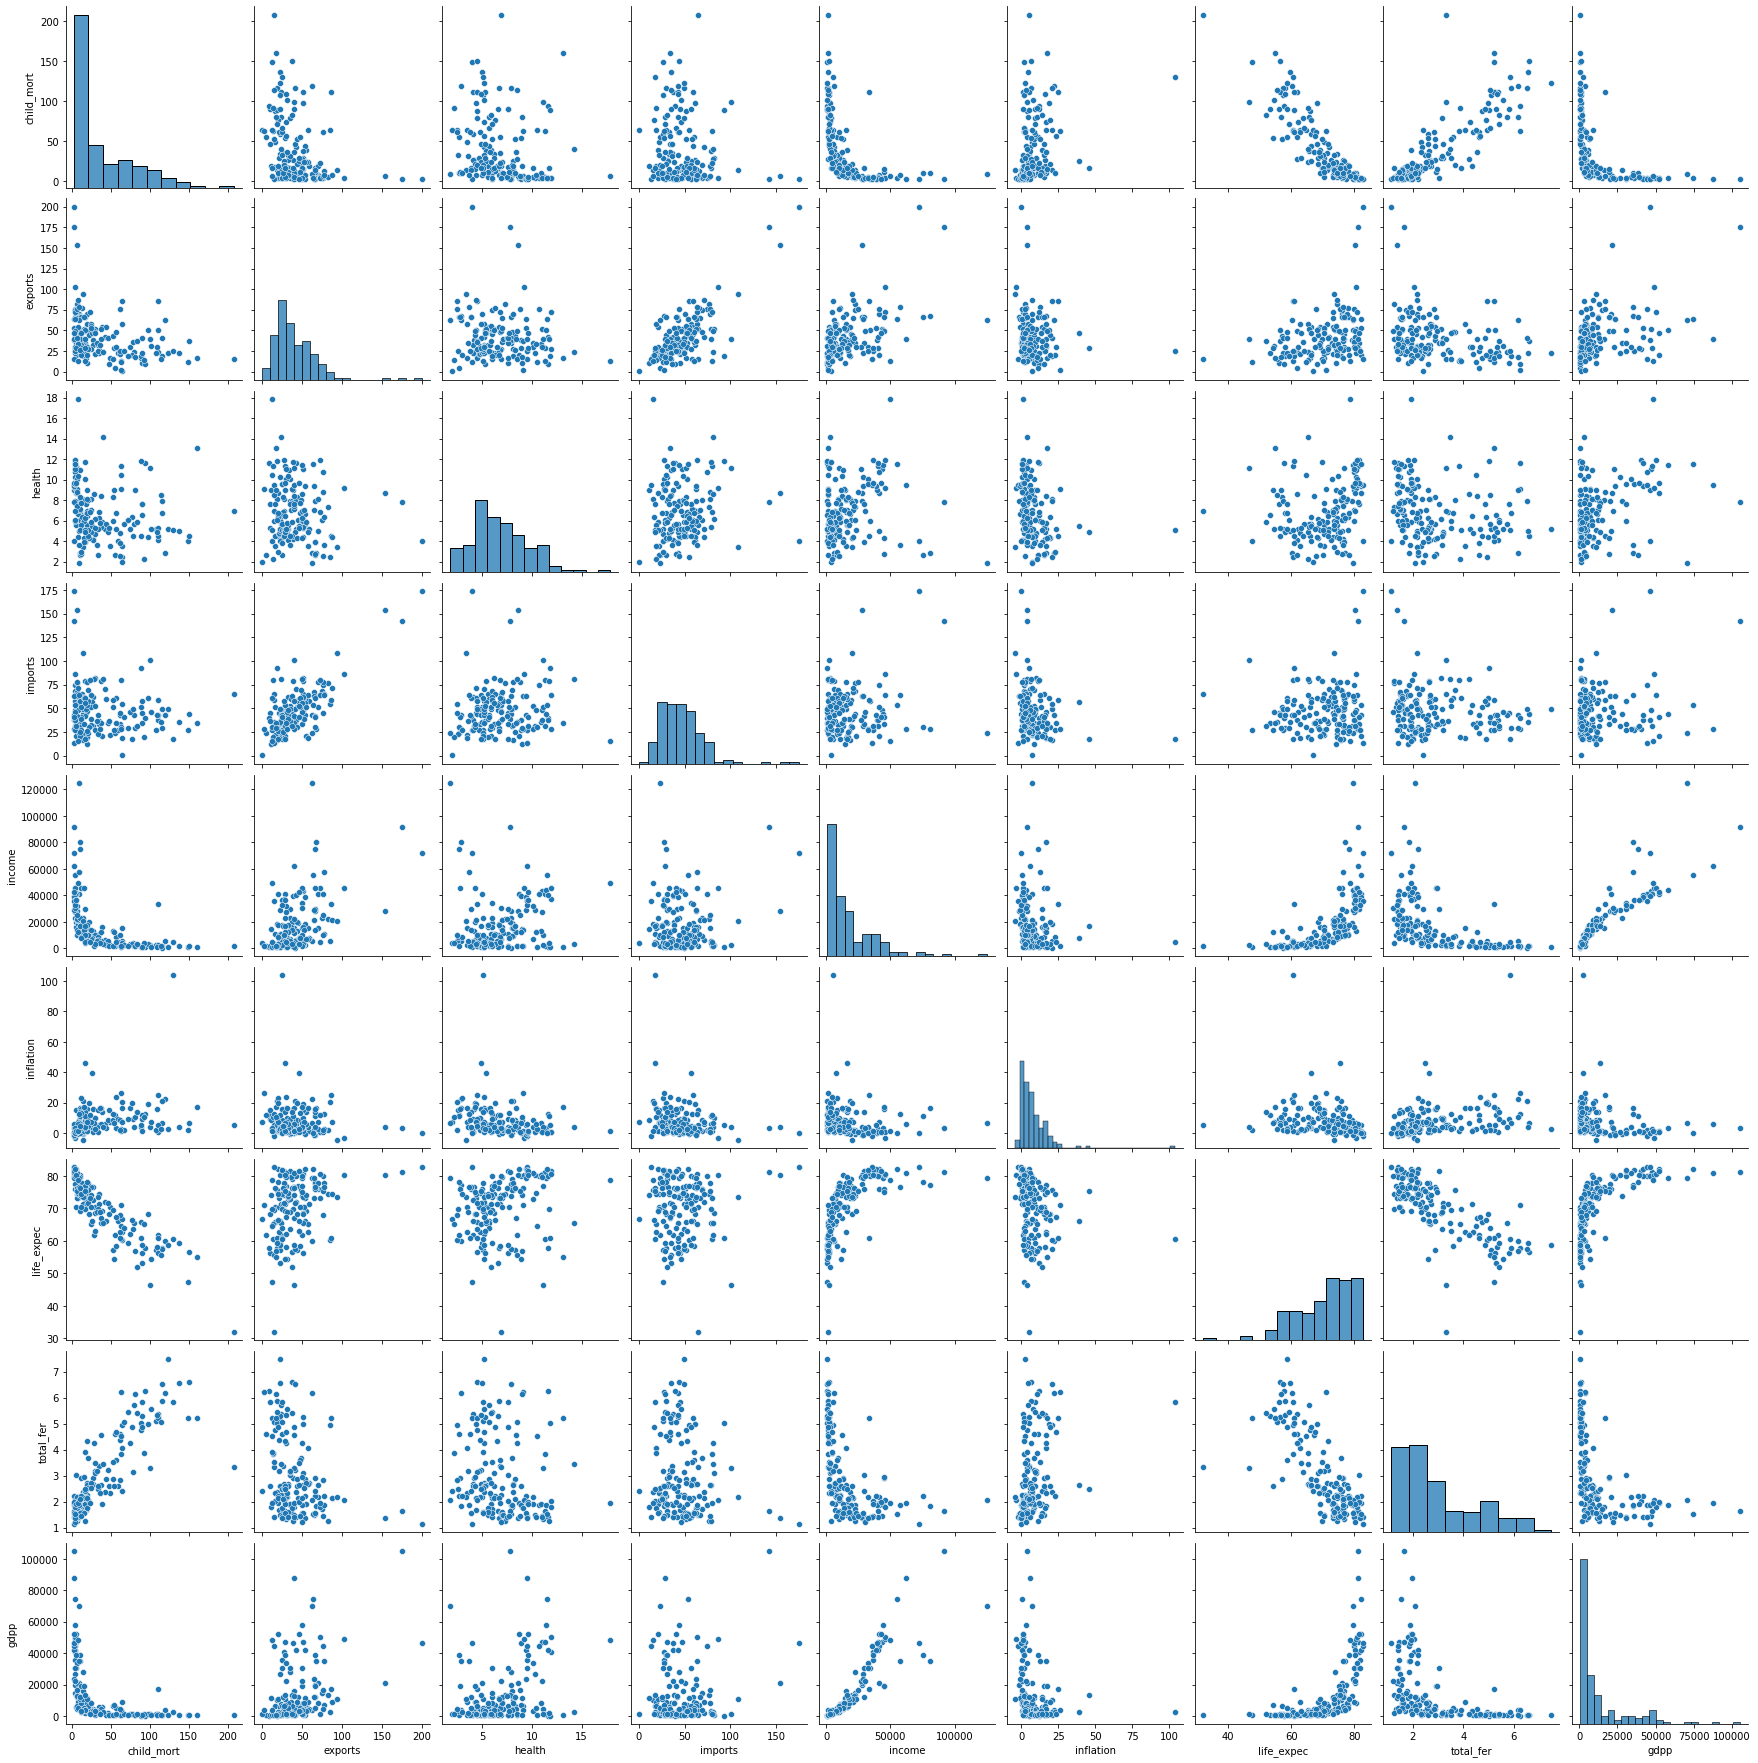

In [53]:
g = sns.pairplot(n_data)
g.fig.set_size_inches(25,25)

## Step 3: Data PreProcessing

##Scaling data


As we can see our dataset is not scaled, some values are much bigger than others, if we are not going to scale the data, the model will not be able to perform well. So now we will scale our data using StandardScaler library. This library will transform the data such that the variance will be 1 and mean will be 0.



In [54]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaled = scaling.fit_transform(n_data)

In [55]:
scaled_data = pd.DataFrame(scaled, columns = n_data.columns)
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817



## Step 4:  Data Modelling

                                                         1st Algorithm
## K-Means Clustering

K-means Clustering is one of the most popular library unsupervised machine learning algorithm. It is a distance-based or centroid-based algorithm. The algorithm works as follows:

1. First we need to initialize k points

2. Then we need to categorize each item to its closest mean and we update the mean's coordinate, which are the average of the items categorized in the mean.

3. we are going to repeat the process for a given number of iterations and  at the end we will having our clusters.

Now for deciding how many number of clusters consider we are going  to use a most popular elbow method.


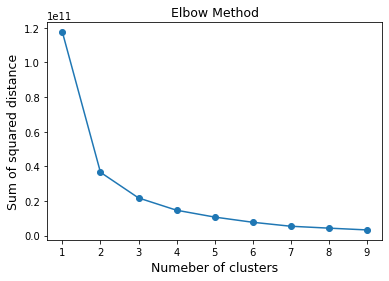

In [56]:
# plotting elbow curve
from sklearn.cluster import KMeans
a = []
K = range(1,10)
for i in K:
  kmean = KMeans(n_clusters = i)
  kmean.fit(n_data)
  a.append(kmean.inertia_)

plt.plot(K, a, marker = 'o')
plt.title('Elbow Method', fontsize = 12.5)
plt.xlabel('Numeber of clusters', fontsize = 12.5)
plt.ylabel('Sum of squared distance', fontsize = 12.5)
plt.show()  

So now as we can see that the elbow like bend is at 3. So we will be choosing 3 as a number of clusters

In [57]:
# Choosing number of clusters as 3 and refitting  kmeana model
kmeans = KMeans(n_clusters = 3,random_state = 57)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=57, tol=0.0001, verbose=0)

In [58]:
# Counting the number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

1    84
2    47
0    36
dtype: int64

## Step 5: Model Evaluation

In [59]:
from sklearn import metrics
metrics.silhouette_score(scaled_data, kmeans.labels_)

0.28329575683463126

## Prediction

In [60]:
cluster_labels = kmeans.fit_predict(scaled_data)

In [61]:
preds = kmeans.labels_
kmeans_data = pd.DataFrame(data)
kmeans_data['Kmeans_Clusters'] = preds
kmeans_data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [62]:
#save a kmeans file
kmeans_data.to_csv('kmeans_result.csv',index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


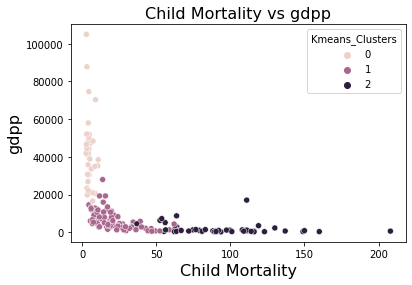

In [63]:
#visulization of clusters child mortality vs gdpp
from sklearn.cluster import KMeans
sns.scatterplot(kmeans_data['child_mort'],kmeans_data['gdpp'],data=kmeans_data, hue='Kmeans_Clusters') 
plt.title("Child Mortality vs gdpp", fontsize=16)
plt.xlabel("Child Mortality", fontsize=16)
plt.ylabel("gdpp", fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


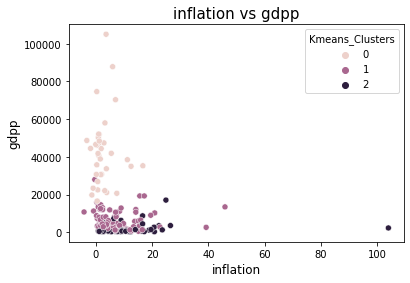

In [64]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(kmeans_data['inflation'],kmeans_data['gdpp'],data=kmeans_data, hue='Kmeans_Clusters') 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

# From the above two clusters graph we can conclude that.

1. Country having high child-mortality, low gdpp and low inflation is the **under-developing country**
2. Country having low child-mortality, high gdpp and high inflation is the **developed country**


---







So here we concluding that 

0 = Under-developing country

1 = developing country

2 = developed country

In [65]:
#find number of developed country,developing country,under-developed country
under_developing=kmeans_data[kmeans_data['Kmeans_Clusters']==0]['country']
developing=kmeans_data[kmeans_data['Kmeans_Clusters']==1]['country']
developed=kmeans_data[kmeans_data['Kmeans_Clusters']==2]['country']

print("Number of under-developing countries: ",len(under_developing))
print("Number of developing countries:       ",len(developing))
print("Number of developed countries:        ",len(developed))

Number of under-developing countries:  36
Number of developing countries:        84
Number of developed countries:         47


In [66]:
list(developed)

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [67]:
list(under_developing)

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [68]:
list(developing)

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

## Let's check that whether India is developing countries list

In [69]:
for i in developing:
  if i == "India" :
    print('Yes', i, 'is present in developing country list')

Yes India is present in developing country list


                                                            2nd Algorithm

## Hierarchical Clustering

Also called Hierachical cluster analysis is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom. This clustering technique is further divided into two type: 

1. Divisive Hierarchical Clustering

2. Agglomerative Hierarchical Clustering 


             AGGLOMERATIVE HIERARCHICAL CLUSTERING

The Agglomerative Hierarchical Clustering is the most common type of hierarchical clustering  used to group objects in clusters based on their similarity. It is also known as Agglomerative Nesting . It is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

                Dendogram
A Dendogram is a type of tree diagram showing hierarchical relationships between different sets of data.

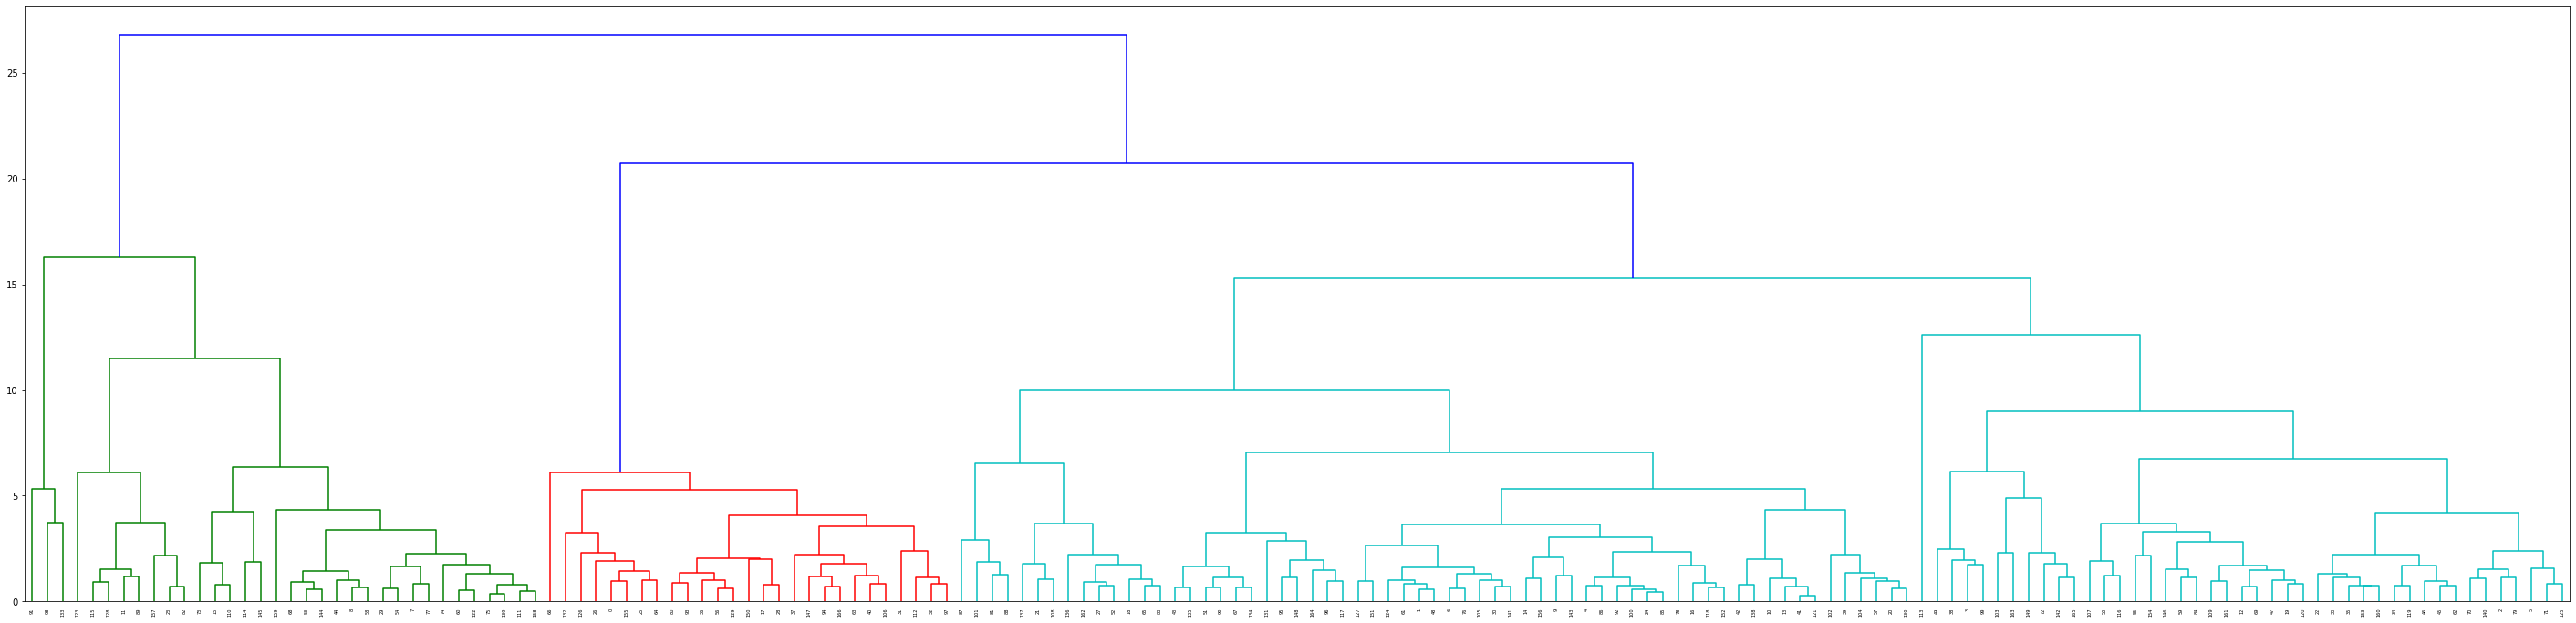

In [71]:
# plotting the dendogram
import scipy.cluster.hierarchy as hcluster
plt.figure(figsize = (50,12))
dend = hcluster.dendrogram(hcluster.linkage(scaled_data, method = 'ward' ))

From the above dendogram we can take minimum number of clusters as two and maximum number of clusters as 5.

In [76]:
# now getting labels from Agglomerative hierarchichal clustering 
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hcluster.fit_predict(scaled_data)
hcluster_label = hcluster.labels_

In [78]:
hcluster_data = pd.DataFrame(data)
# adding hcluster labels in hcluster_data
hcluster_data['hcluster'] = hcluster_label
hcluster_data.head(11)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_Clusters,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1,1


## Visualization of hcluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


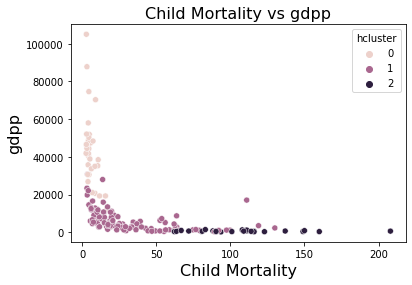

In [81]:
#child mortality vs gdpp
sns.scatterplot(hcluster_data['child_mort'], hcluster_data['gdpp'], data = hcluster_data, hue = 'hcluster')
plt.title("Child Mortality vs gdpp", fontsize = 16)
plt.xlabel("Child Mortality", fontsize = 16)
plt.ylabel("gdpp", fontsize = 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


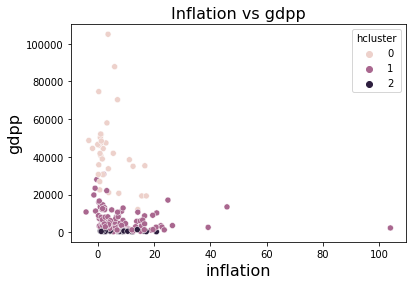

In [84]:
#inflation vs gdpp
sns.scatterplot(hcluster_data['inflation'], hcluster_data['gdpp'], data = hcluster_data, hue = 'hcluster')
plt.title("Inflation vs gdpp", fontsize = 16)
plt.xlabel("inflation", fontsize = 16)
plt.ylabel("gdpp", fontsize = 16)
plt.show()

 From the above we can conclude that :

 0 = developed country

 1 = developing country
 
 2 = under-developing country

In [87]:
# findingg the total numbers of developed, developing, under-developed country
developed = hcluster_data[hcluster_data['hcluster'] == 0]['country']
developing=hcluster_data[hcluster_data['hcluster']==1]['country']
under_developing=hcluster_data[hcluster_data['hcluster']==2]['country']

print("Number of deveoped countries",len(developed))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(under_developing))

Number of deveoped countries 34
Number of developing countries 106
Number of under-developing countries 27
